#                                         Hate Speech Detection

In dataset:  
For Class  0:hate
           1:offensive
           2:neither hate nor offensive

In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing data as a dataframe
df = pd.read_csv('train.csv')

## Data Lookup

In [7]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [9]:
df.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


## Data Cleaning

In [10]:
data = df[['class','tweet']]
data['label'] = data['class'].map({0:'Hate',
                                  1:'Offensive',
                                  2:'Neither hate nor offensive'})
data.head()

/var/folders/49/zq4h7yms78xf47s4w_6n86k80000gn/T/ipykernel_11820/3407623334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['class'].map({0:'Hate',


,class,tweet,label
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither hate nor offensive
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive


In [11]:
#Removing all characters from string
data['tweet'] = data['tweet'].astype(str)
data['tweet'] = data['tweet'].str.replace('!', '', regex=True)
data['tweet'] = data['tweet'].str.replace(':', '', regex=True)
data['tweet'] = data['tweet'].str.replace('@', '', regex=True)
data['tweet'] = data['tweet'].str.replace('RT', '', regex=True)
data['tweet'] = data['tweet'].str.replace('&', '', regex=True)
data['tweet'] = data['tweet'].str.replace('#', '', regex=True)
data['tweet'] = data['tweet'].str.replace('.', '', regex=True)
data['tweet'] = data['tweet'].str.replace('http', '', regex=True)
data['tweet'] = data['tweet'].str.replace('/', '', regex=True)
data['tweet'] = data['tweet'].str.replace('?', '', regex=True)
data['tweet'] = data['tweet'].str.replace(',', '', regex=True)
data['tweet'] = data['tweet'].str.replace(';', '', regex=True)
data['tweet'] = data['tweet'].str.replace('~', '', regex=True)
data['tweet'] = data['tweet'].str.replace('*', '', regex=True)
data['tweet'] = data['tweet'].str.replace('|', '', regex=True)
data['tweet'] = data['tweet'].str.replace('-', '', regex=True)
data['tweet'] = data['tweet'].str.replace('"', '', regex=True)
data['tweet'] = data['tweet'].str.replace('_', '', regex=True)
data['tweet'] = data['tweet'].str.replace('amp', '', regex=True)

/var/folders/49/zq4h7yms78xf47s4w_6n86k80000gn/T/ipykernel_11820/3928013043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].astype(str)
/var/folders/49/zq4h7yms78xf47s4w_6n86k80000gn/T/ipykernel_11820/3928013043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].str.replace('!', '', regex=True)
/var/folders/49/zq4h7yms78xf47s4w_6n86k80000gn/T/ipykernel_11820/3928013043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [12]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.add('As')

In [13]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language = 'english')

In [14]:
def data_clean (line):
    line = str(line)
    output_string = re.sub(r'\d+', '', line)                     #removes numbers
    output_string = re.sub(r'\s+', ' ', output_string.strip())   #removes extra spaces
    
    #removing stopwords
    words = [word for word in output_string.split() if word not in stopwords]
    output_string = " ".join(words)
    #stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    output_string = " ".join(stemmed_words)
    return output_string

In [15]:
data['tweet'] = data['tweet'].apply(data_clean)

/var/folders/49/zq4h7yms78xf47s4w_6n86k80000gn/T/ipykernel_11820/257193600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(data_clean)


In [16]:
data.head()

,class,tweet,label
0,2,mayasolov woman complain clean hous man alway ...,Neither hate nor offensive
1,1,mleew boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive
2,1,urkindofbrand dawg sbabylif you ever fuck bitc...,Offensive
3,1,cganderson vivabas look like tranni,Offensive
4,1,shenikarobert the shit hear might true might f...,Offensive


The text is now cleaned at it's best extent.

## Data Visualisation

<Axes: xlabel='class', ylabel='count'>

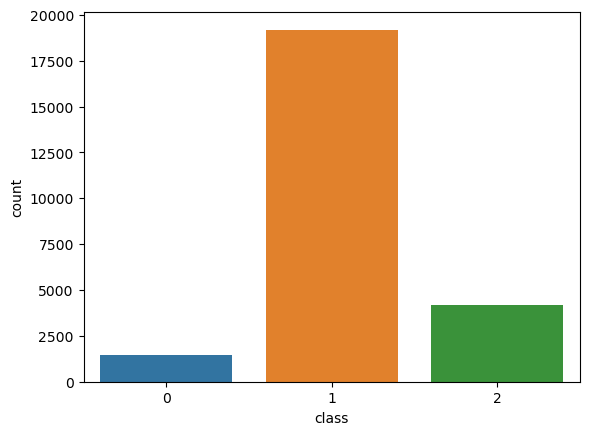

In [17]:
sns.countplot(df,x='class')

/var/folders/49/zq4h7yms78xf47s4w_6n86k80000gn/T/ipykernel_11820/2751217330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word_count']=data['tweet'].apply(word_count)


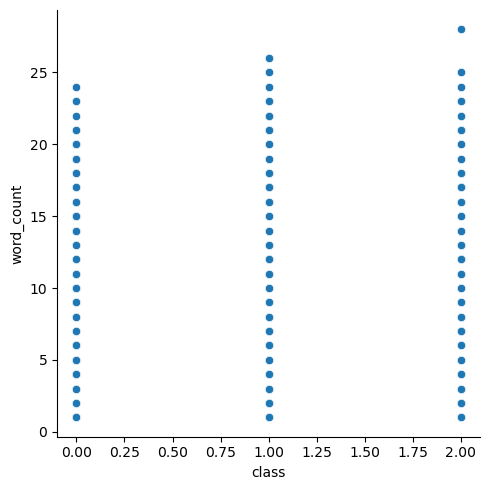

In [18]:
def word_count (line):
    words = line.split()
    return len(words)
data['word_count']=data['tweet'].apply(word_count)
sns.relplot(data,x='class',y='word_count')


As per observations as word count increase the tweet becomes "neither hate nor offensive"

## Model Building

In [19]:
X = data['tweet']
y = data['label']

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
cv = CountVectorizer() 
cv.fit(X)
X = cv.transform(X) 

In [22]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
tfidf = TfidfTransformer()
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
pred = rf_classifier.predict(X_test)

## Results

In [27]:
print("CONFUSION MATRIX - \n")
print(confusion_matrix(y_test,pred)[1:,1:])
print("\nCLASSIFICATION REPORT -")
print('\n',classification_report(y_test,pred))

CONFUSION MATRIX - 

[[ 976  242]
 [ 140 5582]]

CLASSIFICATION REPORT -

                             precision    recall  f1-score   support

                      Hate       0.51      0.19      0.28       417
Neither hate nor offensive       0.85      0.79      0.82      1229
                 Offensive       0.91      0.96      0.94      5789

                  accuracy                           0.89      7435
                 macro avg       0.76      0.65      0.68      7435
              weighted avg       0.88      0.89      0.88      7435



<Axes: >

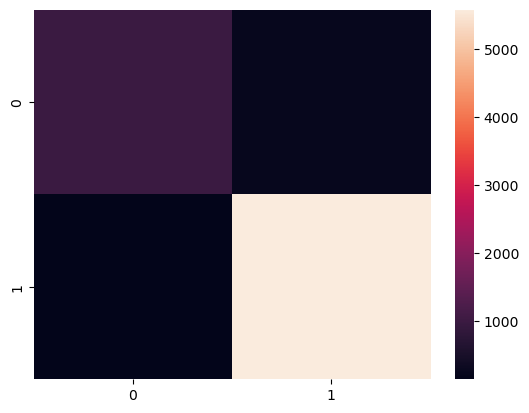

In [28]:
sns.heatmap(confusion_matrix(y_test,pred)[1:,1:])

---> The above model gives us 88% precision